<a href="https://colab.research.google.com/github/evs-11/Data-Science-Probando-Relaciones-Con-Regresion-Lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [73]:
#Importamos bibliotecas, leemos los datos
import pandas as pd

datos = pd.read_csv('/content/precios_casas.csv')
datos.head(2)     # visualizamos las 2 primeras filas de nuestros datos

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [74]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [75]:
# removemos el id que no es de nuestro interes
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [76]:
# Correlación, creamos la variable y de nuestros datos aplicamos el método de pandas, lo almacenamos
corr = datos.corr()

In [77]:
# tomamos de corr únicamente el precio. Vemos que todas influyen de manera positiva
# el valor precio de venta es 1 tiene una correción perfecta porque es lo máximo, representa el mismo comportamiento
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [78]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


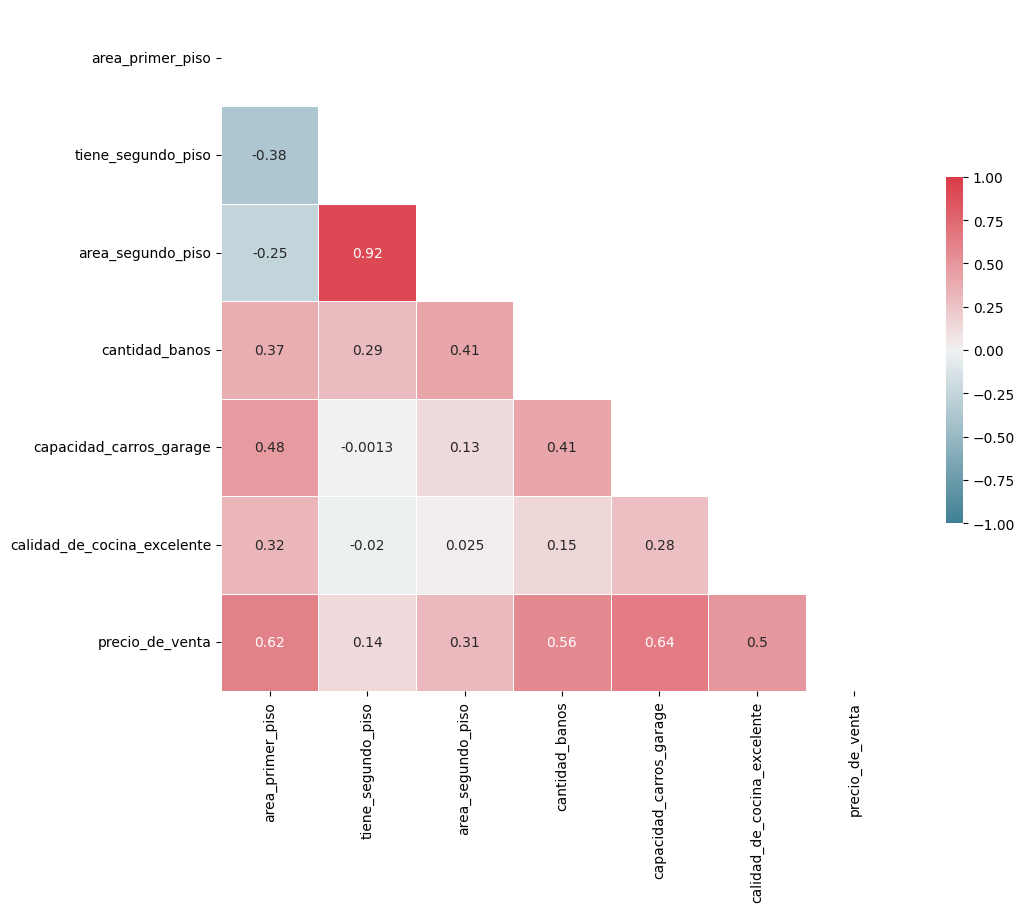

In [79]:
# Actividad
# Cuáles factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

###**Consejo**: Presta atención a los puntos a continuación para un análisis completo:

Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

Ejemplo:

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

## Relacionando variables

In [80]:
# importando los paquetes para la visualización
import plotly.express as px

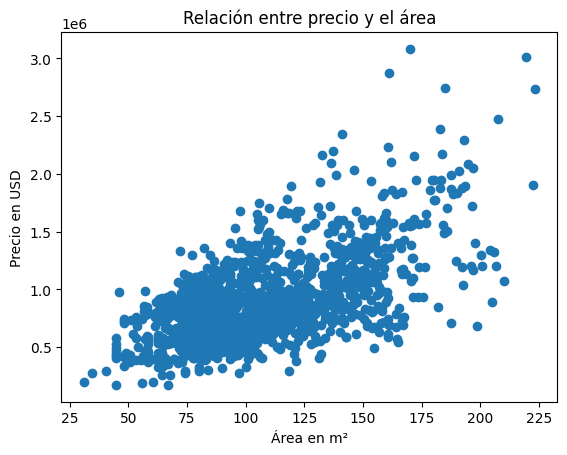

In [81]:
# Cómo se relacionan el área construída y el precio del inmueble? Gráfico de dispersión
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])     # para ejes x,y
plt.title('Relación entre precio y el área')   #título
plt.xlabel('Área en m²')                       #título eje x
plt.ylabel('Precio en USD')                    #título eje y
plt.show()                                     #mostramos

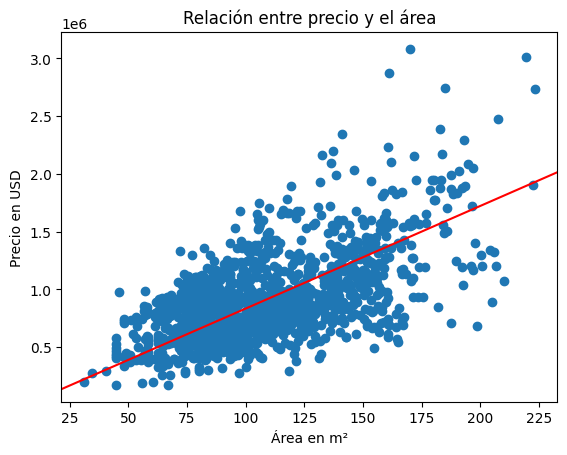

In [82]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# Y si quisieramos trazar una línea que nos permita describir este comportamiento?

plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])           # para ejes x,y
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')                 # trazar recta
plt.title('Relación entre precio y el área')   #título
plt.xlabel('Área en m²')                       #título eje x
plt.ylabel('Precio en USD')                    #título eje y
plt.show()

## Mejor recta

In [83]:
# Cuál es la recta que mejor se ajusta a esta relación.
# Usamos el método de los mínimos cuadrados ordinarios(ols). Es un gráfico interactivo.
# nos dice la distancia mínima con respecto a los residuos.
px.scatter(datos,x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso(eje x)  
* Variable de respuesta/dependiente: Precio de la casa(eje y)

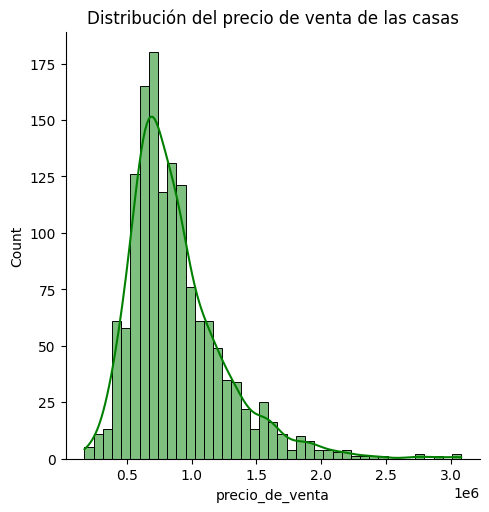

In [84]:
#Quién es nuestra variable de respuesta? creamos histograma
sns.displot(datos['precio_de_venta'],kde=True,color='green')
plt.title('Distribución del precio de venta de las casas')
plt.show()

El gráfico anterior lo leemos: la densidad(count) es la cantidad del valor del precio donde está más concentrados. Los precios de venta de las casas tiene una mayor concentración alrededor de los 600-700 mil USD. El resto que va hacia los 3 millones son observaciones atípicas. La mayor densidad se encuentra entre los 400 mil y 1.200.000

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [85]:
# import train_test_split. Permite tomar la base y hacer una repartición entre una bse de entrenamiento y una base de prueba como tal
from sklearn.model_selection import train_test_split

# definimos Y que es el precio de venta. X son todos los atributos eleimando essa columna
y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

# separamos para entrenamiento y para prueba.
# random_state es un rango de aleatoriedad para producir la misma ejecución de inmuebles,
# garantiza la reproductibilidad de la segregación de los datos
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=230)



In [86]:
#Datos de entrenamiento para usar la fórmula. Creamos Df con variables dependientes e independientes
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train    # creamos la columna

In [87]:
# import ols
from statsmodels.formula.api import ols

In [88]:
# ajustando el primer modelo.
# ~ con respecto a...
# fit entrena el model de lo que está dentro del paréntesis.
modelo_0 = ols('precio_de_venta ~ area_primer_piso',data=df_train).fit()


## Analizando los coeficientes

(intensidad, dirección y significancia)




In [119]:
# visualizando los parámetros. Tiene los atributos el área del primer piso(el Efecto en el gráfico siguiente)
# y el valor de intercepción, entre el eje en cero e Y, son USD.

modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [120]:
# El resumen del modelo. Da los resultados de la regresión. La técnica ols ayuda a desconsiderar
# los valores atípicos(outliers)
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        01:25:14   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


En este gráfico la relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

###**Estimación de la regresión lineal simple**

Vale la pena repasar cada componente de la regresión lineal:

.Variable Respuesta (Y): También llamada variable dependiente, es aquella que estamos tratando de predecir.

.Intercepto (β₀): El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.

.Variable Explicativa (X): También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.

.Coeficientes de Regresión (β₁): Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.

.Error Residual (e): Diferencia entre los valores reales y previstos de la variable respuesta.

## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente(el precio de la casa)

El coeficiente de determinación, frecuentemente llamado R², es una medida estadística que indica cuánto de la variabilidad de la variable dependiente (respuesta) es explicada por el modelo de regresión lineal.

In [127]:
# observando el R².
# cuál es el porcentaje que el área del primer piso explica la variación
# del precio de la casa.
# el 37% del área de la casa explica la variación del precio de la casa

round(modelo_0.rsquared,2)

np.float64(0.38)

## Entendiendo el resíduo

In [123]:
# Quiénes son los residuos?.
# El residuo debe ser lo más cercano a cero posible
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


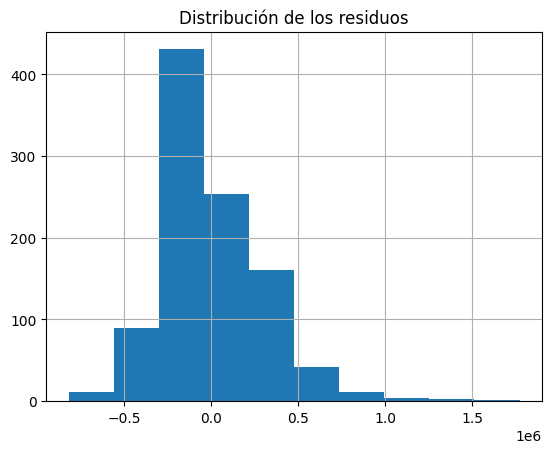

In [124]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [129]:
# Esto es con la base de prueba
# definiendo la 'Y' prevista.  Prediciendo colocando los datos de prueba(X_test)
# el modelo nunca vio
y_predict = modelo_0.predict(X_test)

In [128]:
# importando el r2_score
from sklearn.metrics  import r2_score

print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de : {round(r2_score(y_test,y_predict),2)}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de : 0.39


In [96]:
# mostrando el resultado de r²
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de : {round(r2_score(y_test,y_predict),2)}')

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [97]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [98]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [99]:
# importando la api de statsmodels


In [100]:
# Añadiendo una constante


In [101]:
# Creando el modelo de regresión (con todas las variables): saturado


In [102]:
# Modelo sin el área del segundo piso


In [103]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [104]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [105]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [106]:
# Añadiendo una constante en X_test


In [107]:
# Previsión con el modelo 3


In [108]:
# Cuál es el r² de la previsión?


In [109]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [110]:
#Nuevo inmueble


In [111]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [112]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [113]:
# Leyendo varias casas?


In [114]:
# Añadiendo una constante


In [115]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [116]:
# importar el VIF de statsmodel


In [117]:
# VIF 1


In [118]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">